# Analyze Record Data

In [1]:
import pandas as pd
from src.helpers.labels import ClassLabels

RECORD_DATA_PATH = "record_data.csv"

In [2]:
record_data = pd.read_csv(RECORD_DATA_PATH)
record_data

,MUTATION_EFFECT_LABEL,PROTEIN,MUTATION,INTERACTOR,PDB_ID,CHAIN_ID_1,CHAIN_ID_2,ERROR_ENCOUNTERED,SUBMITTED,SAVED,RESULT_URL,JOB_ID,PDB_ID_REGISTERED,MUTATED_CHAIN,MUTATION_REGISTERED,DDG_PREDICTED,INTERFACE,DELETERIOUS
0,1,Q9BPZ3,F118A,P11940,1jgn,B,A,Error: we have the following requirements for ...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,P01116,Y40C,P50749,3ddc,A,B,NaN,1,1,https://lilab.jysw.suda.edu.cn/research/mutabi...,Job Id: 2022102717134899375098563,Job Id: 2022102717134899375098563,A,Y40C,2.38,Yes,Yes
2,1,Q96QK1,F534D,Q9UBQ0,2r17,C,A,NaN,1,1,https://lilab.jysw.suda.edu.cn/research/mutabi...,Job Id: 2022102717361551438880483,Job Id: 2022102717361551438880483,C,F534D,1.64,Yes,Yes
3,1,Q96QK1,F534D,Q9UBQ0-2,2r17,C,A,NaN,1,1,https://lilab.jysw.suda.edu.cn/research/mutabi...,Job Id: 2022102717480232687747253,Job Id: 2022102717480232687747253,C,F534D,1.62,Yes,Yes
4,1,O43521-3,G66A,Q07812,3fdl,B,A,Error: we have the following requirements for ...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,1,P84243,Q94A,Q9UER7-3,4hga,B,A,Error: we have the following requirements for ...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
736,1,Q96QK1,L589D,Q9UBQ0,2r17,C,A,NaN,1,1,https://lilab.jysw.suda.edu.cn/research/mutabi...,Job Id: 2022110921594465294179037,Job Id: 2022110921594465294179037,C,L589D,1.37,Yes,No
737,1,Q96QK1,L589D,Q9UBQ0-2,2r17,C,A,NaN,1,1,https://lilab.jysw.suda.edu.cn/research/mutabi...,Job Id: 2022111000354900368262290,Job Id: 2022111000354900368262290,C,L589D,1.39,Yes,No
738,1,P23297,F72L,P25815,2y5i,A,B,NaN,1,1,https://lilab.jysw.suda.edu.cn/research/mutabi...,Job Id: 2022111000480306590214984,Job Id: 2022111000480306590214984,A,F72L,2.09,Yes,Yes


In [3]:
errors_encountered = set()
for error_message in record_data["ERROR_ENCOUNTERED"].unique():

    if pd.isnull(error_message):
        continue

    error_header = error_message.split("\n")[0]
    errors_encountered.add(error_header)

errors_encountered

{'Error: we have the following requirements for the input file, and your submitted file does not meet one or more.'}

In [6]:
prediction_data = record_data[
    ["MUTATION_EFFECT_LABEL", "PROTEIN", "MUTATION", "INTERACTOR", "PDB_ID", "CHAIN_ID_1", "DDG_PREDICTED", "INTERFACE", "DELETERIOUS"]
].copy()

prediction_data = prediction_data.rename(
    columns={
        "MUTATION_EFFECT_LABEL": "Mutation_Effect_Label",
        "PROTEIN": "UniProt_ID",
        "MUTATION": "Mutation",
        "INTERACTOR": "Interactor_UniProt_ID",
        "PDB_ID": "pdb_id",
        "CHAIN_ID_1": "chain_id",
        "DELETERIOUS": "MutaBind2_Prediction"
    }
)

prediction_data

,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,pdb_id,chain_id,DDG_PREDICTED,INTERFACE,MutaBind2_Prediction
0,1,Q9BPZ3,F118A,P11940,1jgn,B,NaN,NaN,NaN
1,1,P01116,Y40C,P50749,3ddc,A,2.38,Yes,Yes
2,1,Q96QK1,F534D,Q9UBQ0,2r17,C,1.64,Yes,Yes
3,1,Q96QK1,F534D,Q9UBQ0-2,2r17,C,1.62,Yes,Yes
4,1,O43521-3,G66A,Q07812,3fdl,B,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
735,1,P84243,Q94A,Q9UER7-3,4hga,B,NaN,NaN,NaN
736,1,Q96QK1,L589D,Q9UBQ0,2r17,C,1.37,Yes,No
737,1,Q96QK1,L589D,Q9UBQ0-2,2r17,C,1.39,Yes,No
738,1,P23297,F72L,P25815,2y5i,A,2.09,Yes,Yes


[nan, 'Yes', 'No']


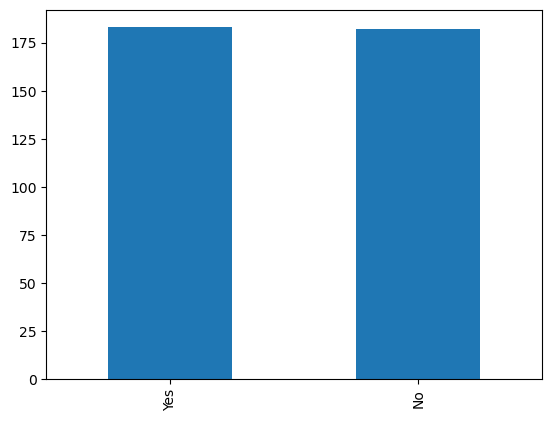

In [7]:
print(prediction_data["MutaBind2_Prediction"].unique().tolist())
prediction_data["MutaBind2_Prediction"].value_counts().plot(kind="bar");

In [8]:
prediction_data["MutaBind2_Prediction"] = prediction_data["MutaBind2_Prediction"].replace(
    {"Yes": ClassLabels.DISRUPTING, "No": ClassLabels.NONDISRUPTING}
)
prediction_data

,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,pdb_id,chain_id,DDG_PREDICTED,INTERFACE,MutaBind2_Prediction
0,1,Q9BPZ3,F118A,P11940,1jgn,B,NaN,NaN,NaN
1,1,P01116,Y40C,P50749,3ddc,A,2.38,Yes,1.0
2,1,Q96QK1,F534D,Q9UBQ0,2r17,C,1.64,Yes,1.0
3,1,Q96QK1,F534D,Q9UBQ0-2,2r17,C,1.62,Yes,1.0
4,1,O43521-3,G66A,Q07812,3fdl,B,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
735,1,P84243,Q94A,Q9UER7-3,4hga,B,NaN,NaN,NaN
736,1,Q96QK1,L589D,Q9UBQ0,2r17,C,1.37,Yes,0.0
737,1,Q96QK1,L589D,Q9UBQ0-2,2r17,C,1.39,Yes,0.0
738,1,P23297,F72L,P25815,2y5i,A,2.09,Yes,1.0


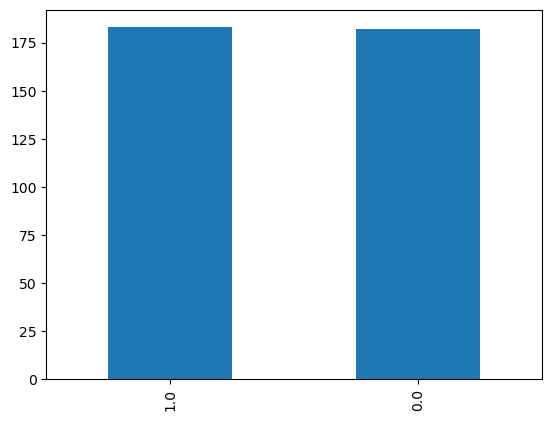

In [9]:
prediction_data["MutaBind2_Prediction"].value_counts().plot(kind="bar");

In [10]:
from src.Benchmark.RivalStudies.MutaBind2.src.Record_.utils import save_prediction_data

In [12]:
save_prediction_data(".", "mutabind2_predictions_with_interface_col", prediction_data)

Prediction data `.\mutabind2_predictions_with_interface_col_2022-11-09.csv`is exported.
